In [20]:
# Import necessary libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Suppress FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [21]:
# Load the dataset
data = pd.read_csv('archive/heart.csv')

# Display the first few rows of the dataset
(data.head())


,age,sex,chest pain,resting blood pressure,cholesterol,fasting blood sugar,resting electrcardiographic results,max heart rate achieved,exercise induced angina,ST depression induced by exercise relative to rest,slope of the peak exercide ST segment,number of major vessels,thalassemia,diagnosis of heart attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Display the total number of patients
num_patients = len(data)
print(f"Total number of patients: {num_patients}")


Total number of patients: 303


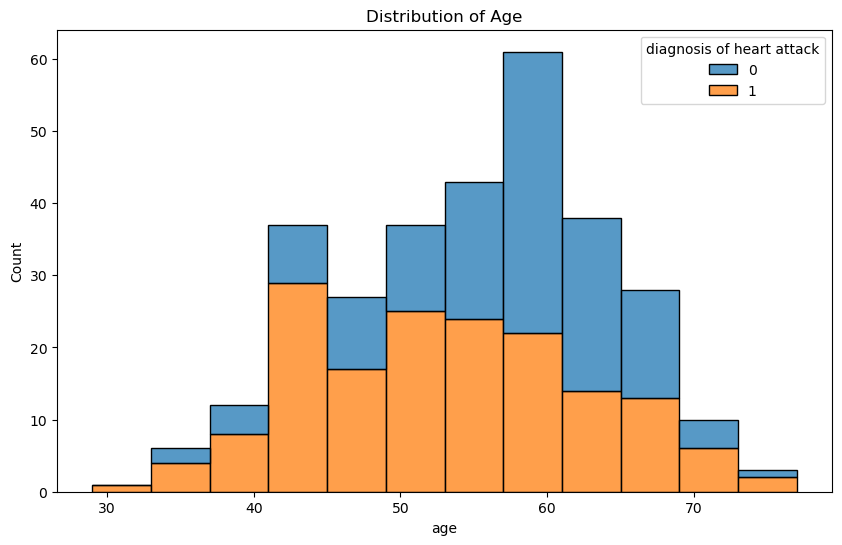

In [23]:
# Plot the distribution of age among patients with and without heart disease
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='age', hue='diagnosis of heart attack', multiple='stack')
plt.title('Distribution of Age')
plt.savefig('Images/Distribution_of_age.png')
plt.show()

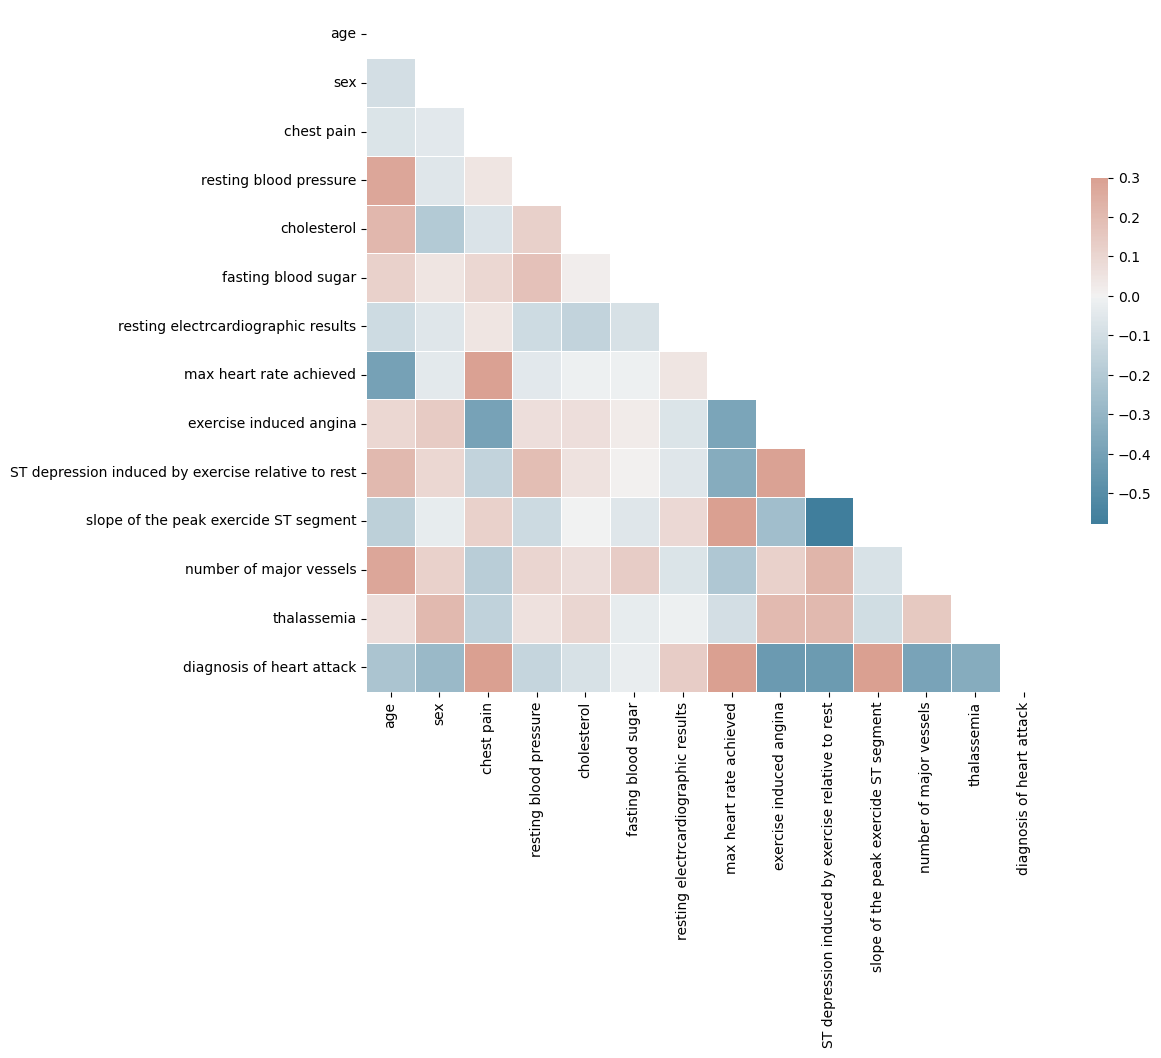

In [24]:
# Compute and display the correlation matrix
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('Images/Heatmap.png')
plt.show()

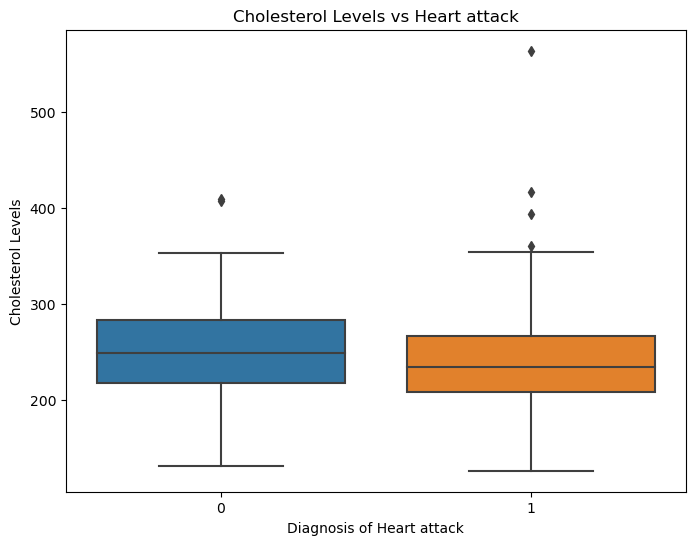

In [25]:
# Create a boxplot for cholesterol levels vs heart disease diagnosis
plt.figure(figsize=(8,6))
sns.boxplot(x='diagnosis of heart attack', y='cholesterol', data=data)
plt.title('Cholesterol Levels vs Heart attack')
plt.xlabel('Diagnosis of Heart attack')
plt.ylabel('Cholesterol Levels')
plt.savefig('Images/Chol_vs_Heart_attack')
plt.show()


In [26]:
# Check for missing data and display using display()
missing_data = data.isnull().sum()
display(missing_data)

# Create age groups with integer labels
bins = [29, 40, 50, 60, 70, np.inf]
labels = [1, 2, 3, 4, 5]  # Integer labels for each bin
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

# Analyze symptoms and display using display()
symptoms = ['chest pain', 'resting blood pressure', 'cholesterol']  
for symptom in symptoms:
    symptom_data = data.groupby(symptom)['diagnosis of heart attack'].value_counts(normalize=True)
    display(symptom_data)

# Replace age range with the midpoint of that range
data['age'] = data['age'].replace('60-69', 65)

# Impute missing values with mean imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Train a logistic regression model using imputed data (excluding 'age_group')
X = data_imputed.drop(['diagnosis of heart attack', 'age_group'], axis=1)
y = data_imputed['diagnosis of heart attack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model 
y_pred = model.predict(X_test)
classification_report_output = classification_report(y_test, y_pred)



age                                                   0
sex                                                   0
chest pain                                            0
resting blood pressure                                0
cholesterol                                           0
fasting blood sugar                                   0
resting electrcardiographic results                   0
max heart rate achieved                               0
exercise induced angina                               0
ST depression induced by exercise relative to rest    0
slope of the peak exercide ST segment                 0
number of major vessels                               0
thalassemia                                           0
diagnosis of heart attack                             0
dtype: int64

chest pain  diagnosis of heart attack
0           0                            0.727273
            1                            0.272727
1           1                            0.820000
            0                            0.180000
2           1                            0.793103
            0                            0.206897
3           1                            0.695652
            0                            0.304348
Name: proportion, dtype: float64

resting blood pressure  diagnosis of heart attack
94                      1                            1.000000
100                     1                            0.500000
                        0                            0.500000
101                     1                            1.000000
102                     1                            1.000000
                                                       ...   
178                     0                            0.500000
180                     0                            0.666667
                        1                            0.333333
192                     0                            1.000000
200                     0                            1.000000
Name: proportion, Length: 77, dtype: float64

cholesterol  diagnosis of heart attack
126          1                            1.0
131          0                            1.0
141          1                            1.0
149          0                            0.5
             1                            0.5
                                         ... 
394          1                            1.0
407          0                            1.0
409          0                            1.0
417          1                            1.0
564          1                            1.0
Name: proportion, Length: 201, dtype: float64

In [27]:
# Analyze correlation between symptoms and heart disease diagnosis
symptom_corr = data.corr()['diagnosis of heart attack'].sort_values(ascending=False)
display(symptom_corr)

diagnosis of heart attack                             1.000000
chest pain                                            0.433798
max heart rate achieved                               0.421741
slope of the peak exercide ST segment                 0.345877
resting electrcardiographic results                   0.137230
fasting blood sugar                                  -0.028046
cholesterol                                          -0.085239
resting blood pressure                               -0.144931
age_group                                            -0.165672
age                                                  -0.225439
sex                                                  -0.280937
thalassemia                                          -0.344029
number of major vessels                              -0.391724
ST depression induced by exercise relative to rest   -0.430696
exercise induced angina                              -0.436757
Name: diagnosis of heart attack, dtype: float64

In [28]:
# This shows the correlation between each symptom and the result of heart disease. 
# The correlation ranges from -1 to 1. Positive correlations mean the higher chance of a heart disease diagnoses.
# Negative correlations mean the likelihood of developing a heart disease is less likely. 

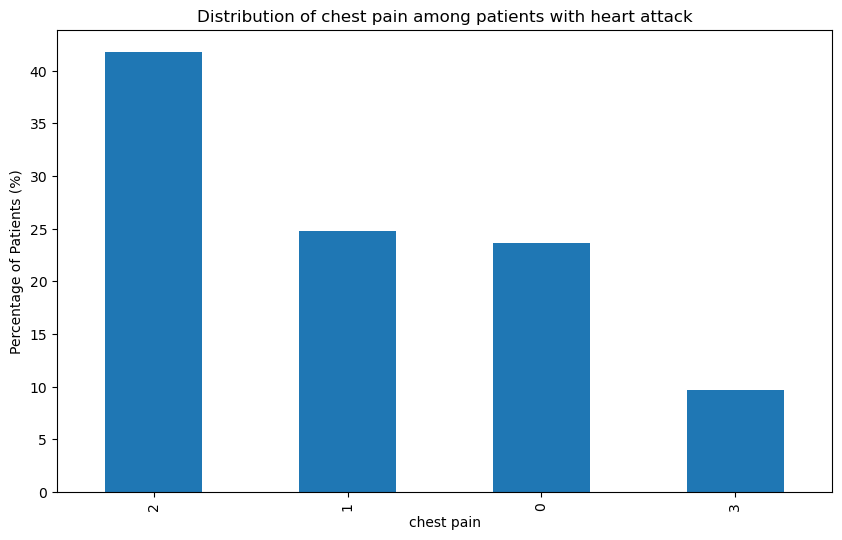

In [29]:
# Analyze symptoms in patients diagnosed with heart disease and display using display()
heart_disease_data = data[data['diagnosis of heart attack'] == 1]
symptoms = ['chest pain']  
for symptom in symptoms:
    symptom_data_heart_disease = heart_disease_data[symptom].value_counts(normalize=True).mul(100).round(1)
    symptom_data_heart_disease.plot(kind='bar', figsize=(10,6))
    plt.title(f'Distribution of {symptom} among patients with heart attack')
    plt.xlabel(symptom)
    plt.ylabel('Percentage of Patients (%)')
    plt.savefig('Images/Distribution_of_CP_with_heart_attack.png')
    plt.show()
    # Chest pain = 0-typical angina, 1-atypical angina, 2-non-anginal pain, 3-asymptomatic

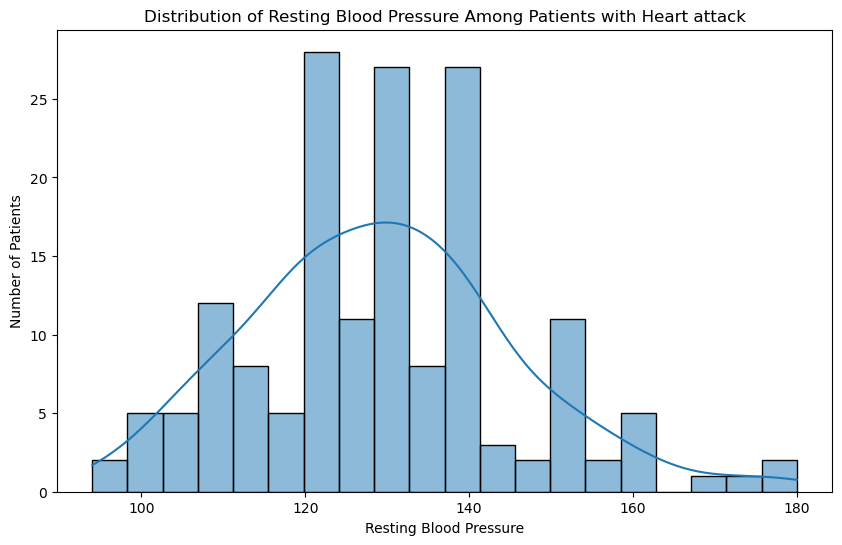

In [30]:
# Analyze symptoms in patients diagnosed with heart disease and display using display()
heart_disease_data = data[data['diagnosis of heart attack'] == 1]

# Create a histogram for 'resting blood pressure' among patients with heart disease
plt.figure(figsize=(10,6))
sns.histplot(heart_disease_data['resting blood pressure'], bins=20, kde=True)
plt.title('Distribution of Resting Blood Pressure Among Patients with Heart attack')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Number of Patients')
plt.savefig('Images/Distribution_RBP_with_heart_attack.png')
plt.show()

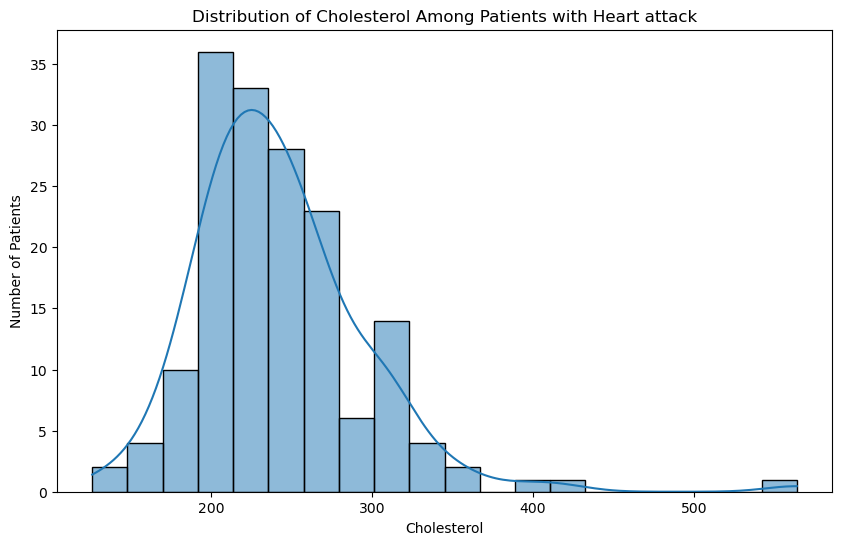

In [31]:
# Create a histogram for 'cholesterol' among patients with heart disease
plt.figure(figsize=(10,6))
sns.histplot(heart_disease_data['cholesterol'], bins=20, kde=True)
plt.title('Distribution of Cholesterol Among Patients with Heart attack')
plt.xlabel('Cholesterol')
plt.ylabel('Number of Patients')
plt.savefig('Images/Distribution_chol_with_heart_attack.png')
plt.show()


In [32]:
# These graphs signify the main symptoms of developing heart disease. Which are chest pain, resting blood pressure, and cholesterol levels.
# 

sex  diagnosis of heart attack
0    1                            75.000000
     0                            25.000000
1    0                            55.072464
     1                            44.927536
Name: proportion, dtype: float64


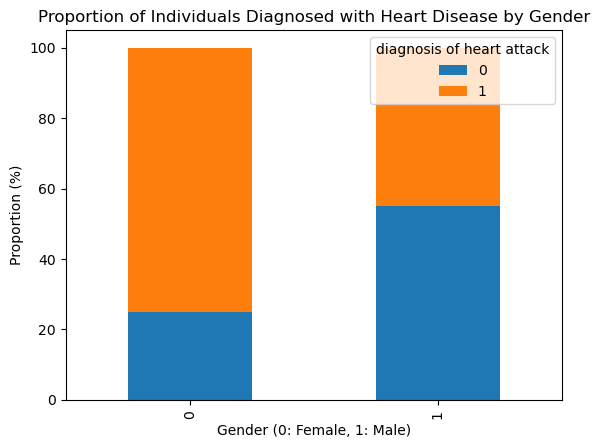

In [33]:
# Group the data by 'sex' and calculate the proportion of individuals 
# in each group who have been diagnosed with heart disease
gender_data = data.groupby('sex')['diagnosis of heart attack'].value_counts(normalize=True)

# Convert proportions to percentages
gender_data_percentage = gender_data.mul(100)

# Display the results in percentage format
print(gender_data_percentage)

# To visualize this, you can create a bar plot
gender_data_percentage.unstack().plot(kind='bar', stacked=True)
plt.title('Proportion of Individuals Diagnosed with Heart Disease by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Proportion (%)')
plt.savefig('Images/Gender_HD')
plt.show()



In [34]:
# In this dataset Females have a higher chance of developing heart disease than Men.

AgeGroup  diagnosis of heart attack
30-39     1                            66.666667
          0                            33.333333
40-49     1                            69.736842
          0                            30.263158
50-59     0                            50.387597
          1                            49.612403
60-69     0                            58.904110
          1                            41.095890
70+       1                            83.333333
          0                            16.666667
Name: proportion, dtype: float64


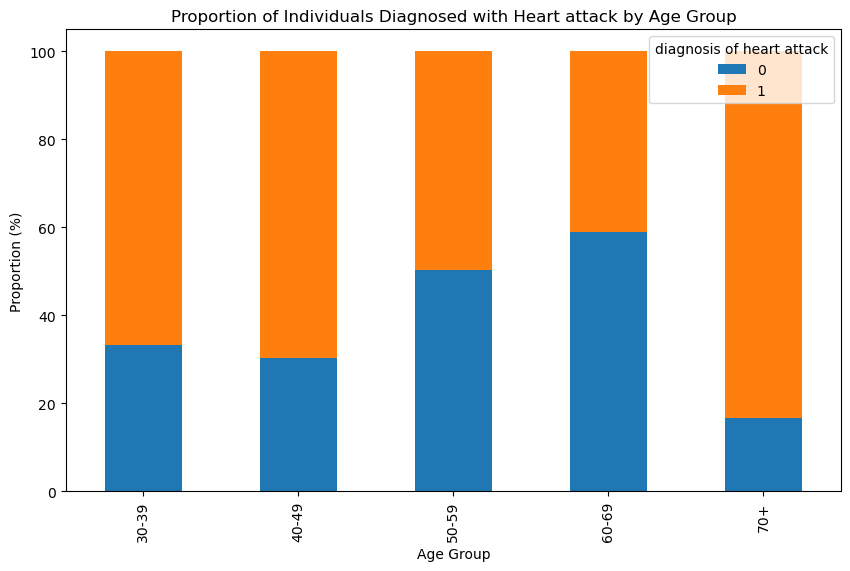

In [35]:
# Define the age bins and their labels
bins = [30, 40, 50, 60, 70, np.inf]
labels = ['30-39', '40-49', '50-59', '60-69', '70+']

# Create a new column in the DataFrame for the age group
data['AgeGroup'] = pd.cut(data['age'], bins=bins, labels=labels)

# Group the data by 'AgeGroup' and calculate the proportion of individuals 
# in each group who have been diagnosed with heart disease
age_group_data = data.groupby('AgeGroup')['diagnosis of heart attack'].value_counts(normalize=True)

# Convert proportions to percentages
age_group_data_percentage = age_group_data.mul(100)

# Display the results in percentage format
print(age_group_data_percentage)

# To visualize this, you can create a bar plot
age_group_data_percentage.unstack().plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Proportion of Individuals Diagnosed with Heart attack by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion (%)')
plt.savefig('Images/Age_group_HD.png')
plt.show()


In [36]:
# Ages 70+ have a higher chance of developing heart disease.